In [1]:
import sys
import os

In [2]:
from importer import *
from utils import *

## Dataset:

Directory Layout:

- Jpg
    - class name (i.e., ‘Meal Time’)
        - Video Number (i.e., ‘0’)
            - Image (something.jpg)
- Event Map
    - class name (i.e., ‘Meal Time’)
        - Video Number(i.e., ‘0’)
            - Event map (npz file)
                - For each object
                - For each body joint



#### Wanted Functionalities:

For images:

- Resize images (16:9)
    - 240 x 135?
    - 320 x 180? (too large for cropping?)


For eventmap:
- Save as images or npz?
    - Better if npz since it's smaller and doesn't take another subdir
    - Save to npz
- Time!
    

## Load Image

In [3]:
CLIPS_ROOT = raw_clip_data
SAVE_ROOT = os.path.join(os.getcwd(), 'data', 'jpg')
SAVE_ROOT

'/home/haruyaishikawa/dev/action_mapping/notebook/data/jpg'

In [4]:
events = [event_names[i] for i in event_ids]
print(events)

event = events[2]
clip_id = 13

['meal time', 'meeting', 'coffee break', 'nap', 'cooking', 'working', 'tending to plants']


In [5]:
dm = ShortClipManagement(event, CLIPS_ROOT, SAVE_ROOT)
clips = dm.change_event(event)

Using Event coffee break
Available clips
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
Using Event coffee break
Available clips
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']


In [6]:
clip = clips[clip_id]
rgb_images = dm.get_sorted_rgb_images(clip)
print(len(rgb_images))

701


## Resize image:

In [7]:
# %matplotlib widget
%matplotlib inline

import matplotlib.pyplot as plt
from PIL import Image

In [8]:
image_num = 201

image_path = os.path.join(dm.get_rgb_path(clip), rgb_images[image_num])

(1280, 720)


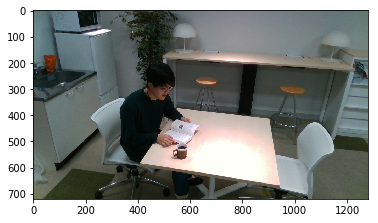

In [9]:
image = Image.open(image_path)
plt.imshow(image)
print(image.size)

In [10]:
def resize_image(image, size=(240, 135), interp=Image.BILINEAR):
    '''
    input: PIL image
    output: resized PIL image
    '''
    return image.resize(size=resize, resample=interp)

Size:
- Probably resize to 240 x 135

Interpolation (Lower, the better, but slow):
- NEAREST
- BOX
- BILINEAR
- HAMMING
- BICUBIC
- LANCZOS

In [11]:
resize = (240, 135)

In [12]:
resized_image = resize_image(image, size=resize, interp=Image.BILINEAR)

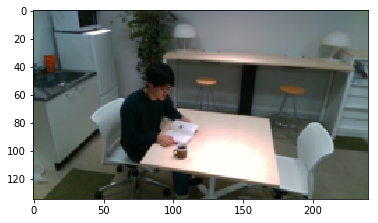

In [13]:
plt.imshow(resized_image)

Save the image:

In [14]:
save_path = dm.get_save_clip_directory(clip)
print(save_path)

Making a save directory in: /home/haruyaishikawa/dev/action_mapping/notebook/data/jpg/coffee break/13
/home/haruyaishikawa/dev/action_mapping/notebook/data/jpg/coffee break/13


In [15]:
image_name = os.path.join(save_path, str(image_num)+'.jpg')
resized_image.save(image_name)

## Eventmap

In [16]:
EVENT_MAP_ROOT = os.path.join(os.getcwd(), 'data', 'event_map')
EVENT_MAP_ROOT

'/home/haruyaishikawa/dev/action_mapping/notebook/data/event_map'